In [1]:
import numpy as np
import matplotlib.pyplot as plt
a1 = -5
a2 = 5
N = 1 << 6

#функция, согласно варианту
light = lambda x: (4 * x ** 2 - 2) * np.exp(-(x ** 2)/2)
x = np.linspace(a1, a2, N, endpoint=False)
f = light(x)

M = 1 << 10
b2 = (N * N) / (4 * a2 * M)
b1 = -b2
u = np.linspace(b1, b2, N, endpoint=False)
hx = (a2 - a1) / N

# БПФ
def bpf(f, N, M, hx):
  k = (M - N) // 2
  F = np.insert(f, 0, np.zeros(k))
  F = np.append(F, np.zeros(k))

  F = np.fft.fftshift(F)
  F = np.fft.fft(F) * hx
  F = np.fft.fftshift(F)

  F = F[len(F) // 2 - N // 2: len(F) // 2 + N // 2]
  return F

F = bpf(f, N, M, hx)

# Аналитическое преобразование Фурье
def analitic_Furie(f):
    h_x = 2*a2 / N
    h_u = 2*b2 / N
    F = 0
    arr_F = []
    for i_u in range(N):
        for i_x in range (N):
           F += h_x * (f[i_x]) * np.exp(-2 * np.pi * 1j * x[i_x] * (-b2 + i_u * h_u))
        arr_F.append(F)
        F = 0
    return arr_F

F_analytical = analitic_Furie(f)
print(F_analytical)

#графики исходного сигнала, согласно варианту
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.plot(x, np.abs(f))
plt.title('Амплитуда светового поля, согласно варианту')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, np.angle(f))
plt.title('Фаза светового поля, согласно варианту')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(u, np.abs(F), label='БПФ', c = 'c', lw = 10)
plt.title('Амплитуда светового поля БПФ, согласно варианту')
plt.plot(u, np.abs(F_analytical), label = 'Аналитическое', c = 'k', lw = 3)
plt.title('Амплитуда светового поля БПФ и аналитическое, согласно варианту')
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(u, np.angle(F), label='БПФ', c = 'c', lw = 10)
plt.title('Фаза светового поля БПФ, согласно варианту')
plt.plot(u, np.angle(F_analytical), label='Аналитическое', c = 'k', lw = 3)
plt.title('Фаза светового поля БПФ и аналитическое, согласно варианту')
plt.legend()
plt.grid()

# двухмерная функция, согласно варианту
light_2d = lambda x, y:  ((4 * x ** 2 - 2) * np.exp(-(x ** 2)/2)) * ((4 * y ** 2 - 2) * np.exp(-(y ** 2)/2))
X, Y = np.meshgrid(x, x)
f_2d = light_2d(X, Y)

#графики исходного сигнала в 2D, согласно варианту
fig, arr = plt.subplots(1, 2, figsize=(10, 5))
amp = arr[0].imshow(np.abs(f_2d), cmap='hot', interpolation='nearest')
arr[0].set_title('Амплитуда светового поля в 2D, согласно варианту')
fig.colorbar(amp, ax=arr[0])
phase = arr[1].imshow(np.angle(f_2d), cmap='hot', interpolation='nearest')
arr[1].set_title('Фаза светового поля в 2D, согласно варианту')
fig.colorbar(phase, ax=arr[1])
plt.show()

# двухмерное быстрое преобразование Фурье
def bpf_2d(Z, a, b, N, M):
    for i in range(N):
      h = (b - a) / (N - 1)
      Z[:, i] = bpf(Z[:, i], N, M, h)
    for i in range(N):
      h = (b - a) / (N - 1)
      Z[i, :] = bpf(Z[i, :], N, M, h)
    return Z

F_2d = f_2d.astype(np.complex128) # в переменную записываем двухмерную функцию, массив комплексных чисел
F_2d = bpf_2d(F_2d, a1, a2, N, M) # двухмерное БПФ

fig, arr = plt.subplots(1, 2, figsize=(10, 5))
amp = arr[0].imshow(np.abs(F_2d), cmap='hot', interpolation='nearest')
arr[0].set_title('Амплитуда светового поля БПФ в 2D, согласно варианту')
fig.colorbar(amp, ax=arr[0])
phase = arr[1].imshow(np.angle(F_2d), cmap='hot', interpolation='nearest')
arr[1].set_title('Фаза светового поля БПФ в 2D, согласно варианту')
fig.colorbar(phase, ax=arr[1])
plt.show()

analytical_2D = np.zeros((N, N), dtype=complex) # создание комплексного массива для аналитического двухмерного решения

# Двухмерное аналитическое решение
for i in range(N):
  for j in range(N):
    analytical_2D[i][j] = F_analytical[i] * F_analytical[j]

#графики исходного сигнала аналитически в 2D, согласно варианту
fig, arr = plt.subplots(1, 2, figsize=(15, 5))
arr[0].imshow(np.abs(analytical_2D), cmap='hot', interpolation='nearest')
arr[0].set_title('Амплитуда светового поля аналитическое в 2D, согласно варианту')
fig.colorbar(amp, ax=arr[0])
phase = arr[1].imshow(np.angle(analytical_2D), cmap='hot', interpolation='nearest')
arr[1].set_title('Фаза светового поля аналитическое в 2D, согласно варианту')
fig.colorbar(phase, ax=arr[1])
plt.show()

#GAUSS
gauss = lambda x: np.exp(-x ** 2)
f_gauss = gauss(x)
F_gauss = bpf(f_gauss, N, M, hx) # результат после БПФ

#графики гауссова пучка
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1)
plt.plot(x, np.abs(f_gauss))
plt.title('Амплитуда гауссова пучка')
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(x, np.angle(f_gauss))
plt.title('Фаза гауссова пучка')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(u, np.abs(F_gauss))
plt.title('Амплитуда гауссова пучка БПФ')
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(u, np.angle(F_gauss))
plt.title('Фаза гауссова пучка БПФ')
plt.grid()

interval = abs(N ** 2 / (4 * a2 * M))
# Шаг дисретизации
step = 2 * interval / (N - 1)
F_rect = analitic_Furie(f_gauss) # аналитическое преобразование Фурье гауссова пучка

#графики исходного сигнала БПФ
plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(u, np.abs(F_rect))
plt.title('Амплитуда гауссова пучка аналитическое')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(u, np.angle(F_rect))
plt.title('Фаза гауссова пучка поля аналитически')
plt.grid()

# Двухмерный гауссов пучок
gauss_2d = lambda x, y: np.exp(-x ** 2 - y ** 2)
f_gauss_2d = gauss_2d(X, Y)

#графики гауссова пучка в 2D
fig, arr = plt.subplots(1, 2, figsize=(10, 5))
amp = arr[0].imshow(np.abs(f_gauss_2d), cmap='hot', interpolation='nearest')
arr[0].set_title('Амплитуда гауссова пучка в 2d')
phase = arr[1].imshow(np.angle(f_gauss_2d), cmap='hot', interpolation='nearest')
arr[1].set_title('Фаза гауссова пучка в 2d')
fig.colorbar(phase, ax=arr[1])
plt.show()

# Двухмерное БПФ двухмерного гауссова пучка
F_gauss_2d = f_gauss_2d.astype(np.complex128)
F_gauss_2d = bpf_2d(F_gauss_2d, a1, a2, N, M)

#графики гауссова пучка БПФ в 2D
fig, arr = plt.subplots(1, 2, figsize=(10, 5))
amp = arr[0].imshow(np.abs(F_gauss_2d), cmap='hot', interpolation='nearest')
arr[0].set_title('Амплитуда гауссова пучка БПФ в 2d')
phase = arr[1].imshow(np.angle(F_gauss_2d), cmap='hot', interpolation='nearest')
arr[1].set_title('Фаза гауссова пучка БПФ в 2d')
fig.colorbar(phase, ax=arr[1])
plt.show()

# Аналитическое двухмерное преобразование Фурье для гауссова пучка
F_gauss_2d_analit = np.zeros((N, N), dtype=complex)
for i in range(N):
  for j in range(N):
    F_gauss_2d_analit[i][j] = F_rect[i] * F_rect[j]

#графики   аналитически гауссова пучка БПФ в 2D
fig, arr = plt.subplots(1, 2, figsize=(10, 5))
amp = arr[0].imshow(np.abs(F_gauss_2d_analit), cmap='hot', interpolation='nearest')
arr[0].set_title('Амплитуда гауссова пучка аналитически в 2d')
phase = arr[1].imshow(np.angle(F_gauss_2d_analit), cmap='hot', interpolation='nearest')
arr[1].set_title('Фаза гауссова пучка аналитически в 2d')
fig.colorbar(phase, ax=arr[1])
plt.show()



ModuleNotFoundError: No module named 'numpy'

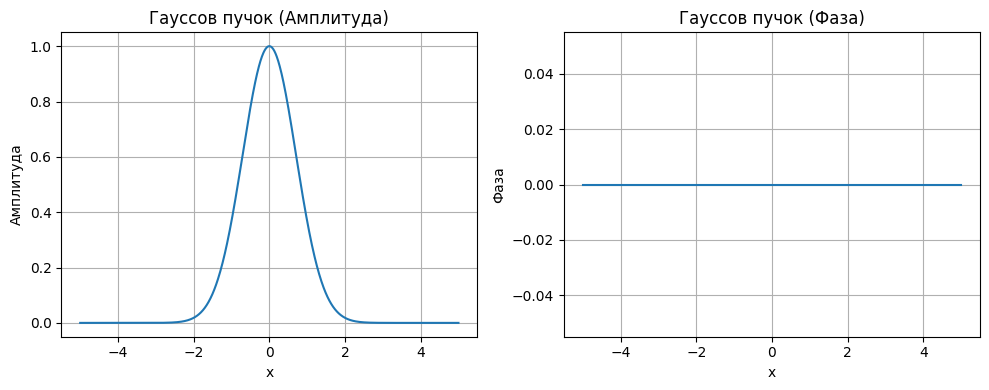

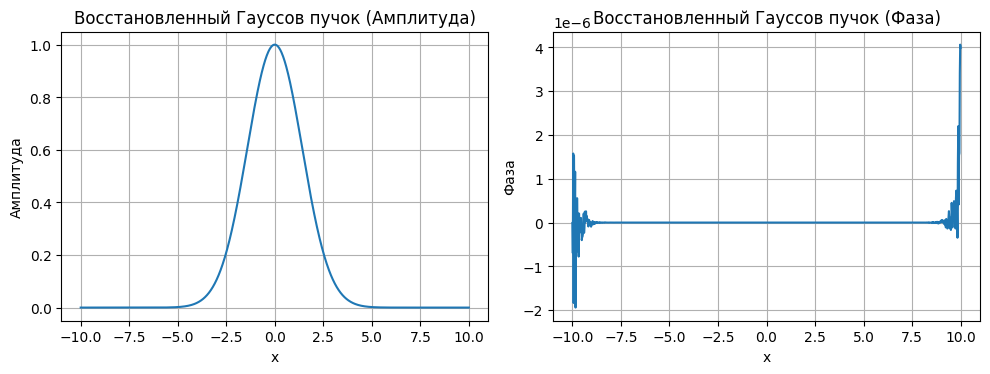

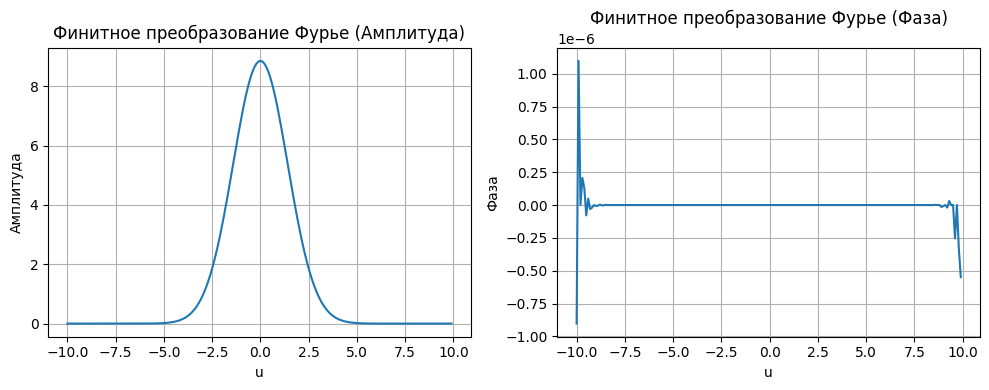

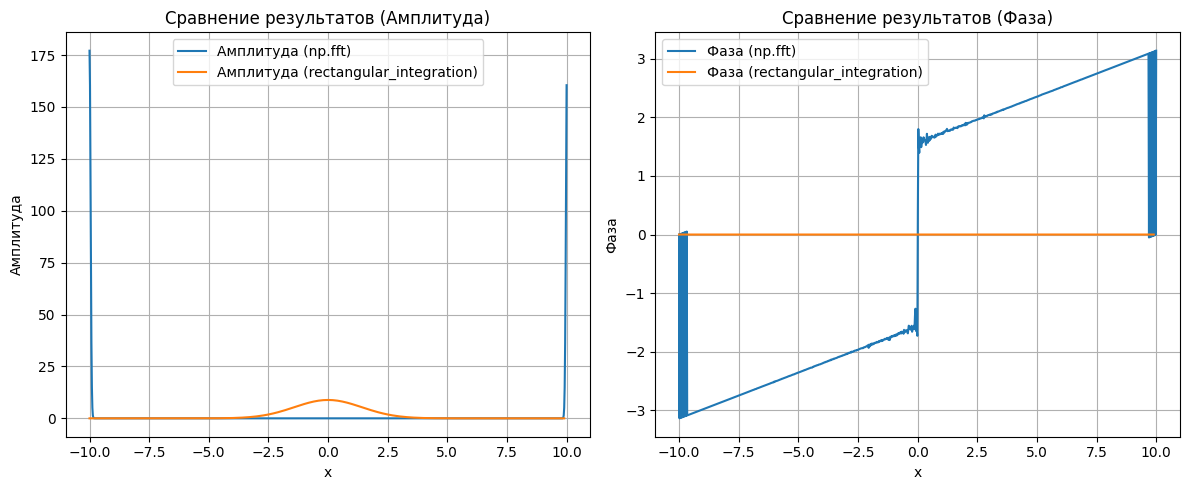

In [5]:
#1
import numpy as np
import matplotlib.pyplot as plt

def fft(x):
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

#2

# Параметры гауссова пучка
x = np.linspace(-5, 5, 1000)
amplitude = np.exp(-x**2)
phase = np.angle(amplitude)

# Построение графика амплитуды
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, amplitude, label='Амплитуда')
plt.xlabel('x')
plt.ylabel('Амплитуда')
plt.title('Гауссов пучок (Амплитуда)')
plt.grid(True)

# Построение графика фазы
plt.subplot(1, 2, 2)
plt.plot(x, phase, label='Фаза')
plt.xlabel('x')
plt.ylabel('Фаза')
plt.title('Гауссов пучок (Фаза)')
plt.grid(True)

plt.tight_layout()
plt.show()

#3

# Параметры гауссова пучка
a = 5
b = 10  # Новая область определения
x = np.linspace(-a, a, 1000)
gaussian_pulse = np.exp(-x ** 2)

# Прямое преобразование Фурье
spectrum = np.fft.fft(gaussian_pulse)

# Создание новой области определения
x_new = np.linspace(-b, b, len(spectrum))

# Обратное преобразование Фурье с учетом новой области определения
reconstructed_pulse = np.fft.ifft(spectrum)

# Построение графика на правильной области определения
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x_new, np.abs(reconstructed_pulse), label='Амплитуда')
plt.xlabel('x')
plt.ylabel('Амплитуда')
plt.title('Восстановленный Гауссов пучок (Амплитуда)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_new, np.angle(reconstructed_pulse), label='Фаза')
plt.xlabel('x')
plt.ylabel('Фаза')
plt.title('Восстановленный Гауссов пучок (Фаза)')
plt.grid(True)

plt.tight_layout()
plt.show()

#4

# Функция для интеграла методом прямоугольников
def rectangular_integration(f, a, b, delta_u):
    u_values = np.arange(a, b, delta_u)
    integral = []
    for u in u_values:
        integral_value = np.sum(f * np.exp(-1j * u * x) * delta_u)
        integral.append(integral_value)
    return integral, u_values

# Параметры гауссова пучка
a = 5
b = 10
x = np.linspace(-b, b, 1000)
gaussian_pulse = np.exp(-x ** 2)

# Дискретизация пространства u
delta_u = 0.1

# Вычисление интеграла
integral_result, u_values = rectangular_integration(gaussian_pulse, -b, b, delta_u)

# Построение графика амплитуды и фазы
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(u_values, np.abs(integral_result), label='Амплитуда')
plt.xlabel('u')
plt.ylabel('Амплитуда')
plt.title('Финитное преобразование Фурье (Амплитуда)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(u_values, np.angle(integral_result), label='Фаза')
plt.xlabel('u')
plt.ylabel('Фаза')
plt.title('Финитное преобразование Фурье (Фаза)')
plt.grid(True)

plt.tight_layout()
plt.show()

#5 

amplitude_fft = np.abs(spectrum)
phase_fft = np.angle(spectrum)

# Построение графиков
plt.figure(figsize=(12, 5))

# График амплитуды
plt.subplot(1, 2, 1)
plt.plot(x_new, amplitude_fft, label='Амплитуда (np.fft)')
plt.plot(u_values, np.abs(integral_result), label='Амплитуда (rectangular_integration)')
plt.xlabel('x')
plt.ylabel('Амплитуда')
plt.title('Сравнение результатов (Амплитуда)')
plt.grid(True)
plt.legend()

# График фазы
plt.subplot(1, 2, 2)
plt.plot(x_new, phase_fft, label='Фаза (np.fft)')
plt.plot(u_values, np.angle(integral_result), label='Фаза (rectangular_integration)')
plt.xlabel('x')
plt.ylabel('Фаза')
plt.title('Сравнение результатов (Фаза)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



In [6]:
from itertools import permutations

n = 4  # Общее количество элементов
m = 2  # Размер перестановки

# Генерируем все перестановки n по m
elements = list(range(0, n))  # Создаем список элементов от 1 до n

# Ограничиваем первое число, чтобы оно не превышало n - m
max_first_number = n + 1 - m
elements = elements[:max_first_number]  # Убираем элементы, начиная с (n - m + 1)

permutations_list = list(permutations(elements, m))

# Выводим все перестановки
for perm in permutations_list:
    print(perm)

(0, 1)
(0, 2)
(1, 0)
(1, 2)
(2, 0)
(2, 1)
